
Tutorial Section on SKLEARN


Scikit-learn, also known as sklearn, is an open-source, robust Python machine learning library. It was created to help simplify the process of implementing machine learning and statistical models in Python

In [ ]:
#Install Sklearn
!pip install -U scikit-learn

We would used the wine datasets for this tutorial, the dataset's task involves classifying wines into one of  three cultivars. The three cultivars (classes) represented in the sklearn wine dataset correspond to different types or varieties of wine grapes. These cultivars are often associated with specific wine-producing regions and have distinct characteristics that influence the flavors, aromas, and overall profiles of the wines produced from them. (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

In [ ]:
#load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [ ]:
# Load the wine dataset from sklearn
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target  # Add target column for visualization

In [ ]:
# Data Description
print(wine_df.info())  # Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
print(wine_df.shape[0])  # Number of rows

178


In [ ]:
print(wine_df.shape[1])  # Number of columns

14


In [ ]:
print(wine_df.columns)  # Names of the columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [ ]:
# Target (class) distribution
print(wine_df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


In [ ]:
# Summary statistics of 'alcohol' content
print(wine_df['alcohol'].describe())

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64


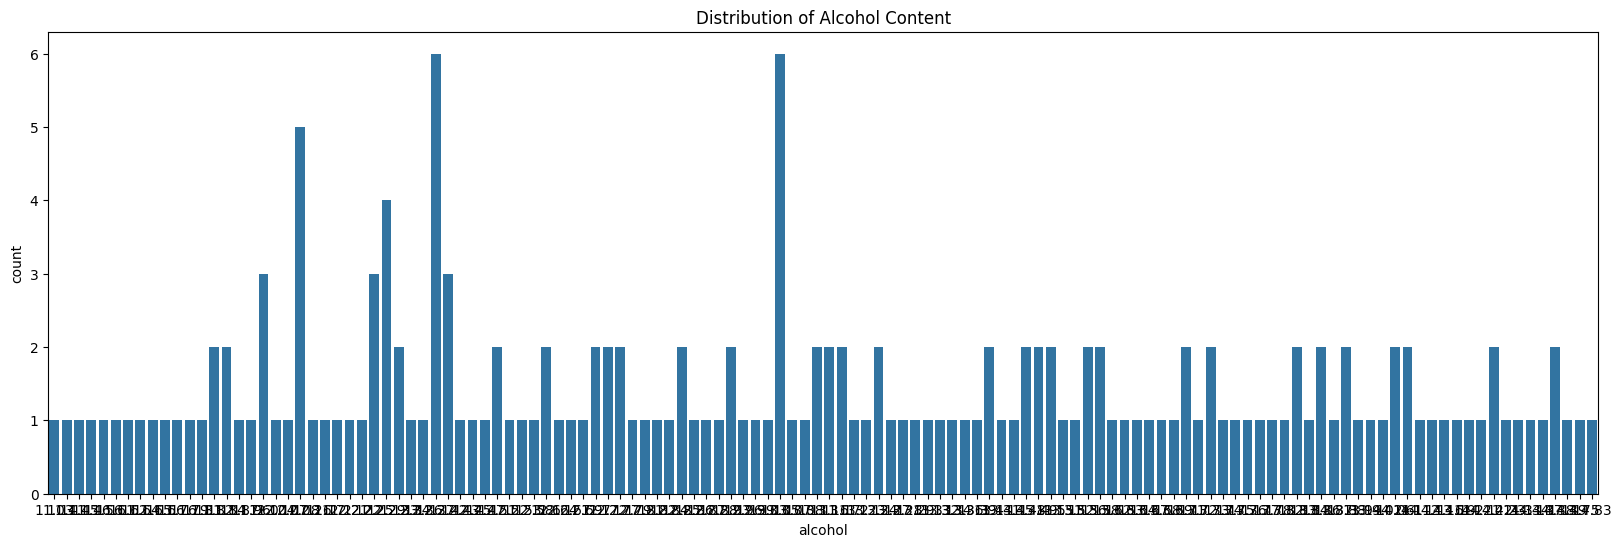

'Plots every single value from the minimum to the maximum'

In [ ]:
# Quick bar plot of alcohol content
plt.figure(figsize=(20, 6))
sns.countplot(x='alcohol', data=wine_df)
plt.title('Distribution of Alcohol Content')
plt.show()

'Plots every single value from the minimum to the maximum'

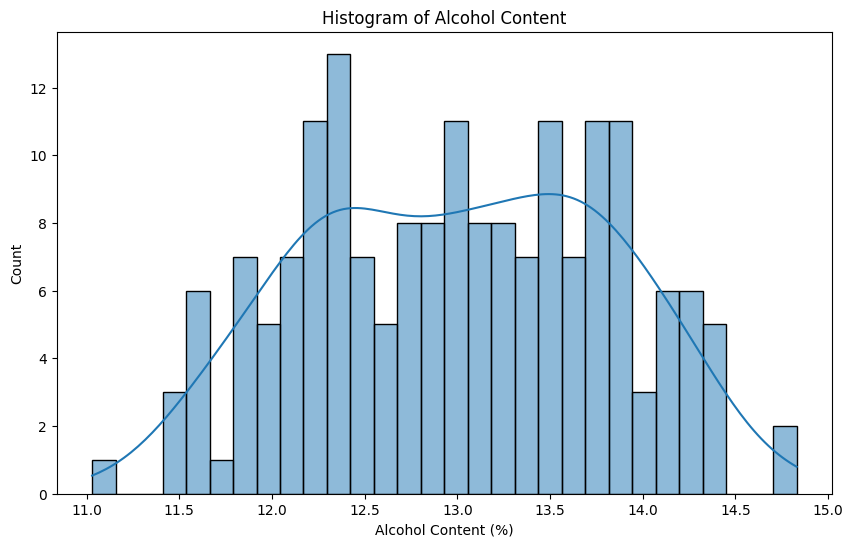

'\nBy setting the bin, you limit the number of bars, think of it this way\nyou have 178 balls but you put them into 30 baskets, the balls closet\nto each other are put in the same basket\n'

In [ ]:
# Histogram of 'alcohol' content
plt.figure(figsize=(10, 6))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()
'''
By setting the bin, you limit the number of bars, think of it this way
you have 178 balls but you put them into 30 baskets, the balls closet
to each other are put in the same basket
'''

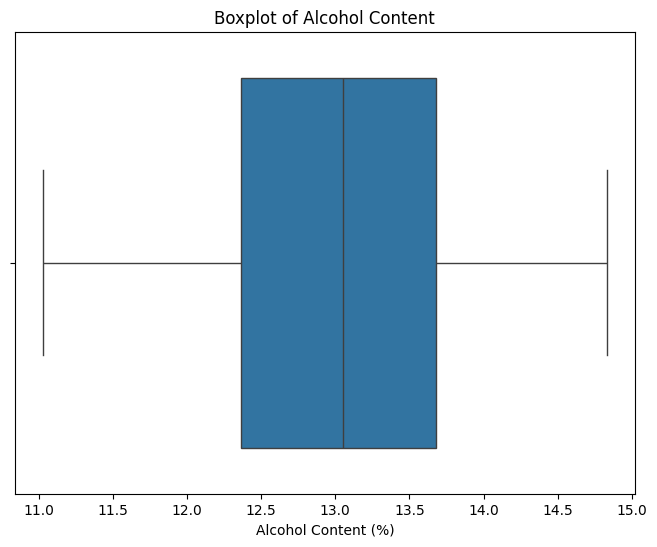

In [ ]:
# Boxplot of 'alcohol' content
plt.figure(figsize=(8, 6))
sns.boxplot(x=wine_df['alcohol'])
plt.title('Boxplot of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

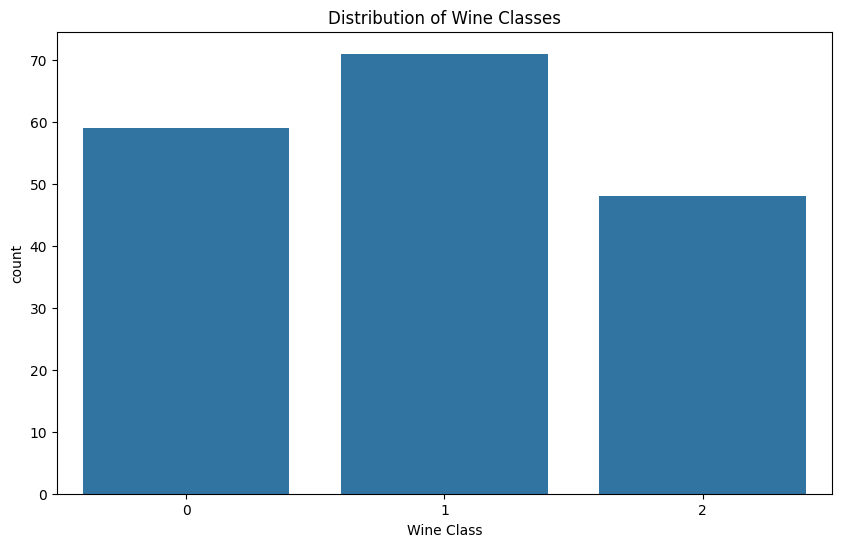

In [ ]:
# Bar plot of 'target' (class)
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=wine_df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.show()

In [ ]:
# Create a two-way table
pd.crosstab(wine_df['alcohol'], wine_df['target'])

#This shows how many members of each class have a specific alcohol content

target,0,1,2
alcohol,,,
11.03,0,1,0
11.41,0,1,0
11.45,0,1,0
11.46,0,1,0
11.56,0,1,0
...,...,...,...
14.37,1,0,0
14.38,2,0,0
14.39,1,0,0


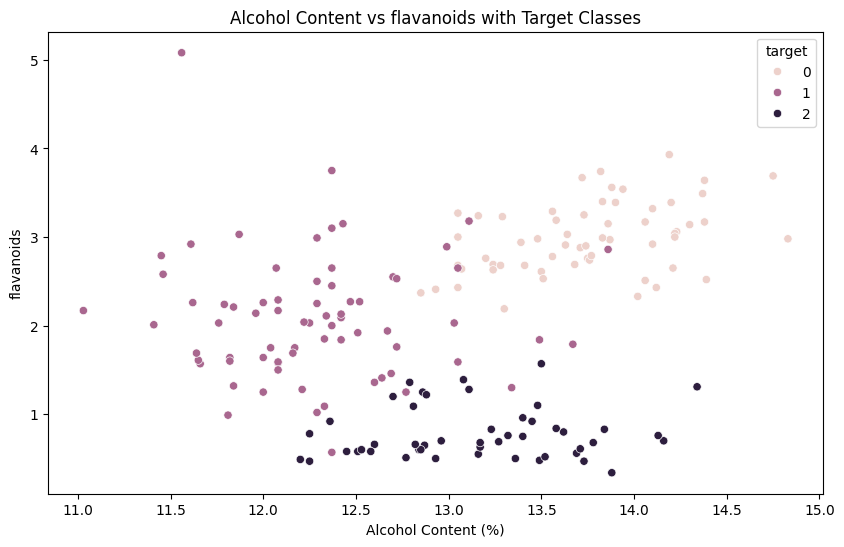

In [ ]:
# Scatter plot of 'alcohol' content vs 'flavanoids' with target classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='flavanoids', hue='target', data=wine_df)
plt.title('Alcohol Content vs flavanoids with Target Classes')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('flavanoids')
plt.show()

In [ ]:
# T-test to compare 'alcohol' content between different target classes
class_0_alcohol = wine_df.loc[wine_df['target'] == 0, 'alcohol']
class_1_alcohol = wine_df.loc[wine_df['target'] == 1, 'alcohol']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(class_0_alcohol, class_1_alcohol, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

T-test (two-sided) p-value: 5.926412330452344e-34


In [ ]:
# Take a preview
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#Data Exploration
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Data preprocessing

Data processing is a vital step in the machine learning workflow because data from the real world is messy. It may contain:

Missing values,
Redundant values
Outliers
Errors
Noise

You must deal with all of this before feeding the data to a machine learning model; otherwise, the model will incorporate these mistakes into its approximation function – it will learn to make mistakes on new instances. This is what formed the famous machine learning saying, “Garbage in, garbage out.”

Another reason is that machine learning models typically require numeric data.  

Other than our data being on different scales, there’s not much else wrong with our data at first glance. To combat this problem, let’s standardize the features using sklearn’s StandardScaler class; this will ensure the mean of each feature is approximately equal to zero.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label
features = wine_df[data.feature_names].copy()
labels = wine_df["target"].copy()



In [ ]:
features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(features)

# Transform features
X_scaled = scaler.transform(features.values)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# View first instance of scaled data
print(X_scaled[0])

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


In [ ]:
# View first instance of unscaled data
print(features.iloc[0])

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64


Model Trainning --- Spliting the dataset

Before a machine learning model can make predictions, it must be trained on a set of data to learn an approximation function.

There are several ways to split data into train and test sets, but scikit-learn has a built-in function to do this on our behalf called train_test_split().

We’ll use this function to split our data such that 70% is used to train the model and 30% is used to evaluate the model's ability to generalize to unseen instances.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                             train_size=.7,
                                                           random_state=0)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(features) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(features) * 100)}%")



Train size: 70% 
Test size: 30%


Building the model
Thanks to sklearn, building a machine learning model is extremely simple.

We are going to build three models to predict the class of wine:

Logistic regression (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
Support vector machine (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
Decision tree classifier(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initializing the model
logistic_regression = LogisticRegression()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
from sklearn.svm import SVC
# Initializing the model
svm = SVC()
# Training the models
svm.fit(X_train_scaled, y_train)
# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initializing the model
tree = DecisionTreeClassifier(random_state=0) #Why do use think we are using random state and why arent we using it for the others, Some Machine learning
                                              #algorithms are prone to randomization and would not produce the same result if random state is not decleared
# Training the models
tree.fit(X_train_scaled, y_train)
# Making predictions with the model
tree_preds = tree.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



Tasks

1. Change the random state of the Decision tree classifier (for example set it to 42), what was the effect of this change
2. Conduct an experiment using the 3 Machine learning algorithms onthe Sklearn breast cancer dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
3. what is the performance of the random forest algorithm on the breast cancer dataset (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Clustering is a type of unsupervised learning technique used to group data points or objects based on their similarity. The goal of clustering is to identify inherent patterns or structures in the data without prior knowledge of true labels. Clustering algorithms partition the data into groups or clusters such that data points within the same cluster are more similar to each other than to those in other clusters.

In this tutorial we would use two clustering algorithms: K-means and Agglomerative Clustering

We would use metrics such as Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Score and Adjusted Rand Index (ARI)

K-means Clustering:
 K-means is a popular centroid-based clustering algorithm. It partitions the data into K clusters by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of data points assigned to each cluster.


Agglomerative Clustering:
Agglomerative clustering is a hierarchical clustering method that starts with each data point as a separate cluster and merges clusters iteratively based on a linkage criterion (e.g., distance between clusters)


Performance Metrics:
Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. Higher score indicates dense and well-separated clusters.

Davies-Bouldin Index: Computes the average similarity between each cluster and its most similar cluster, where lower values indicate better clustering.

Calinski-Harabasz Score: Ratio of within-cluster dispersion to between-cluster dispersion, higher values indicate better-defined clusters.

Adjusted Rand Index (ARI): Compares the similarity of true cluster assignments with the clustering results, providing a measure of cluster accuracy.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score


In [ ]:
# Load the wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # True labels (for adjusted Rand index)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)

In [ ]:
# Fit the clustering algorithms to the scaled data
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [ ]:
# Evaluate K-means clustering performance using multiple metrics
metrics_kmeans = {
    'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, kmeans_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, kmeans_labels)  # Using true labels for ARI
}

print("K-means Clustering Performance:")
for metric_name, metric_value in metrics_kmeans.items():
    print(f"{metric_name}: {metric_value:.4f}")

K-means Clustering Performance:
Silhouette Score: 0.2849
Davies-Bouldin Index: 1.3892
Calinski-Harabasz Score: 70.9400
Adjusted Rand Index: 0.8975


In [ ]:
# Evaluate Agglomerative Clustering performance using multiple metrics
metrics_agg = {
    'Silhouette Score': silhouette_score(X_scaled, agg_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, agg_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, agg_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, agg_labels)  # Using true labels for ARI
}

print("\nAgglomerative Clustering Performance:")
for metric_name, metric_value in metrics_agg.items():
    print(f"{metric_name}: {metric_value:.4f}")


Agglomerative Clustering Performance:
Silhouette Score: 0.2774
Davies-Bouldin Index: 1.4186
Calinski-Harabasz Score: 67.6475
Adjusted Rand Index: 0.7899


We Knew that there were 3 cultivars in the wine dataset, what if we didnt there are several methods that can be used to determine the optimal number of clusters if the number of clusters are not known. Some of them include Elbow Method, Silhouette Analysis, Gap Statistic method, and Hierarchical Clustering

Elbow Method:
The elbow method involves plotting the within-cluster sum of squares (inertia) against the number of clusters (K) and identifying the "elbow" point where the rate of decrease in inertia sharply decreases. This point represents a good estimate for the optimal number of clusters.

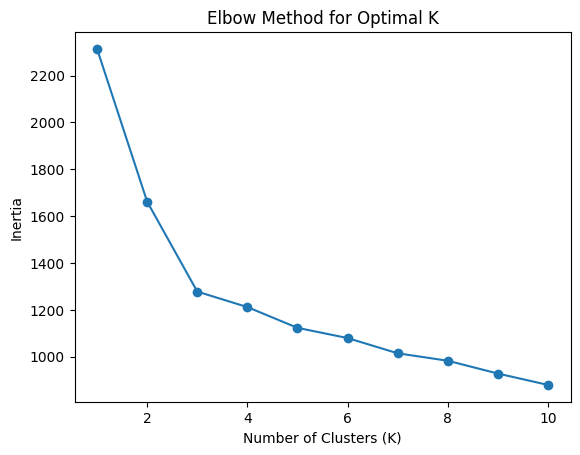

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Silhouette Analysis:
Silhouette analysis measures how well each data point fits into its assigned cluster and can be used to determine the optimal number of clusters. The highest average silhouette score across different numbers of clusters indicates the optimal number of clusters

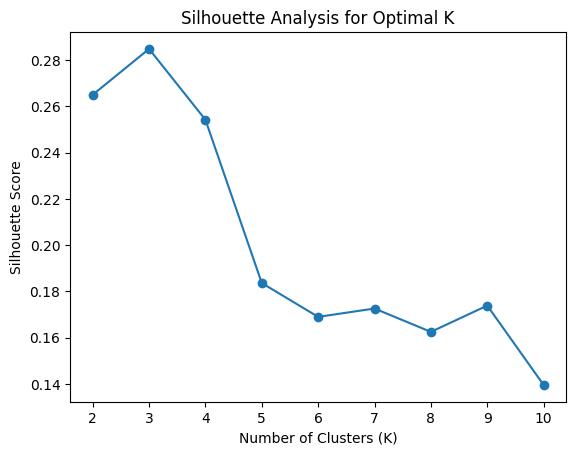

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


Gap Statistic:
The gap statistic compares the within-cluster dispersion of the data to a reference null distribution and helps identify the optimal number of clusters by maximizing the gap statistic value.

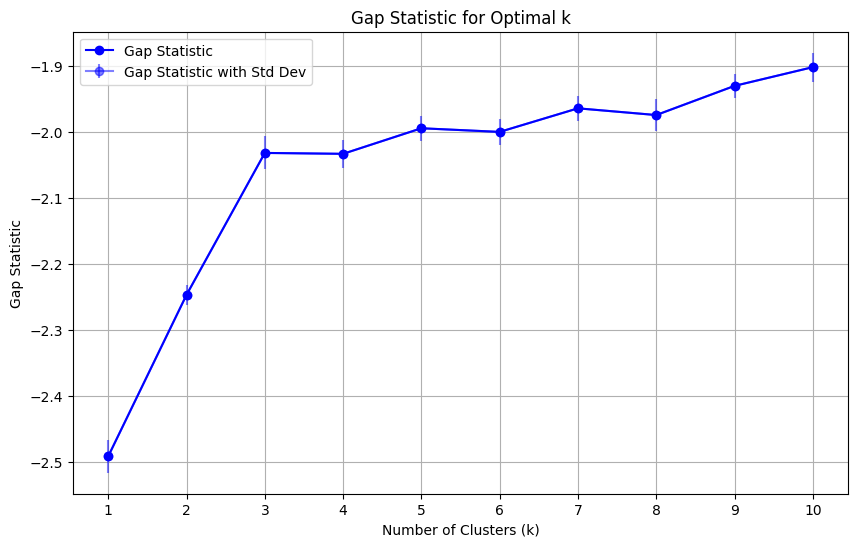

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


def compute_gap_statistic(data, k_range, n_ref_samples=10, random_seed=None):
    """
    Compute the Gap Statistic for estimating the optimal number of clusters.

    Parameters:
        data (numpy.ndarray): Input data matrix (n_samples, n_features).
        k_range (list): List of integers specifying the range of k values (number of clusters) to evaluate.
        n_ref_samples (int): Number of reference samples to generate for calculating the reference distribution.
        random_seed (int): Random seed for reproducibility.

    Returns:
        tuple: Tuple containing the calculated gap statistics and standard deviations for each k value.
    """
    np.random.seed(random_seed)

    # Initialize arrays to store gap statistics and standard deviations
    gap_stats = []
    gap_stds = []

    for k in k_range:
        # Fit KMeans clustering to the data
        kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
        kmeans_model.fit(data)

        # Calculate the within-cluster dispersion (log of sum of square distances)
        Wk = np.log(kmeans_model.inertia_)

        # Generate reference datasets and calculate their within-cluster dispersions
        ref_Wks = []
        for _ in range(n_ref_samples):
            # Generate reference dataset with the same shape and distribution as the original data
            ref_data = np.random.rand(*data.shape)

            # Fit KMeans to reference dataset
            ref_kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
            ref_kmeans_model.fit(ref_data)

            # Calculate within-cluster dispersion of reference dataset
            ref_Wk = np.log(ref_kmeans_model.inertia_)
            ref_Wks.append(ref_Wk)

        # Calculate Gap Statistic and its standard deviation
        gap_stat = np.mean(ref_Wks) - Wk
        gap_std = np.std(ref_Wks) * np.sqrt(1 + 1/n_ref_samples)

        gap_stats.append(gap_stat)
        gap_stds.append(gap_std)

    return np.array(gap_stats), np.array(gap_stds)


# Define the range of k values (number of clusters) to evaluate
k_range = range(1, 11)

# Compute Gap Statistic for the range of k values
gap_stats, gap_stds = compute_gap_statistic(X_scaled, k_range, n_ref_samples=10, random_seed=42)

# Plotting the Gap Statistic curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, gap_stats, marker='o', color='b', label='Gap Statistic')
plt.errorbar(k_range, gap_stats, yerr=gap_stds, fmt='-o', color='b', alpha=0.5, label='Gap Statistic with Std Dev')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

Hierarchical Clustering (Dendrogram):
Hierarchical clustering can provide insights into the underlying structure of the data by visualizing a dendrogram, which represents the hierarchical merging of clusters. The height at which branches are merged can help determine the number of clusters.

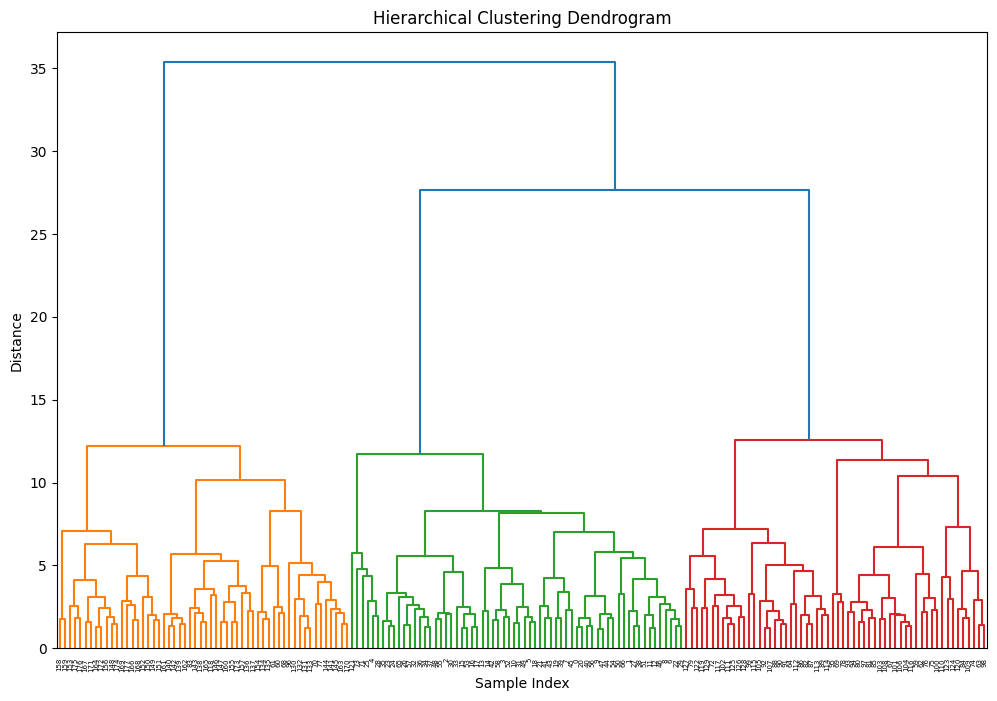

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Task: repeat the clustering tasks for the Sklearn BRCA dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_preds = log_reg.predict(X_test_scaled)

print("Logistic Regression:\n", classification_report(y_test, log_preds))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)

print("SVM:\n", classification_report(y_test, svm_preds))

SVM:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
tree_preds = tree.predict(X_test_scaled)

print("Decision Tree:\n", classification_report(y_test, tree_preds))

Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Breast Cancer Clustering - Sklearn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target  # for comparison only

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("KMeans ARI:", adjusted_rand_score(y, kmeans_labels))


KMeans ARI: 0.676504895633523


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

print("Agglomerative Clustering ARI:", adjusted_rand_score(y, agg_labels))

Agglomerative Clustering ARI: 0.5750409366326297


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Filter out noise (-1) for ARI comparison
valid = db_labels != -1
if valid.sum() > 0:
    print("DBSCAN ARI (excluding noise):", adjusted_rand_score(y[valid], db_labels[valid]))
else:
    print("DBSCAN found only noise.")

DBSCAN ARI (excluding noise): 0.5545724675704035


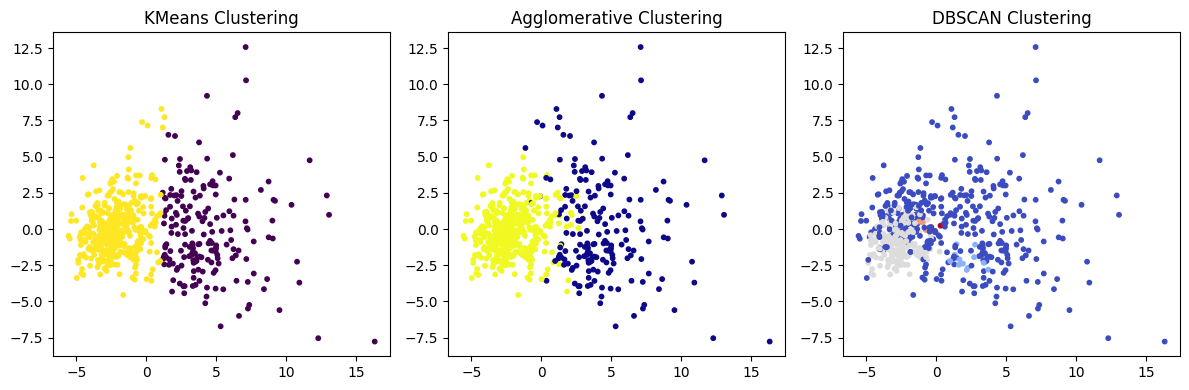

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='plasma', s=10)
plt.title("Agglomerative Clustering")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='coolwarm', s=10)
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

	•	KMeans & Agglomerative both performed well with high ARI scores, closely matching the true labels.
	•	DBSCAN might label most points as noise unless eps and min_samples are carefully tuned.
	•	Visualization shows how well each algorithm separated clusters in 2D space.

In [ ]:
import joblib

joblib.dump(svm, 'svm_model.pkl')

# Save the scaler for use in backend
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from google.colab import files
files.download('svm_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>